## Chute libre

Des étudiants ont effectués une expérience de chute libre: ils ont fait tomber un objet de chaque étage de l'Atrium, sans vitesse initiale, et ont mesuré à chaque fois le temps de chute $T$ de l'objet ainsi que la hauteur de l'étage $H$. On reporte dans le tableau ci-dessous le résultat des mesures pour 4 groupes différents.

![data chute libre](./table_analyse_chute.png)

Nous savons que l'objet chute sous l'effet de la pesanteur. Nous voulons grâce à cette expérience déterminer la magnitude de la pesanteur. Pour cela, nous utilisons un modèle simple du temps de chute libre. On montre facilement d'après la loi fondamentale de la dynamique, si on néglige les frottements de l'air, le lien entre la hauteur de l'étage $H$, le temps de chute $T$, et la magnitude de la pesanteur $g$:

$$
H = g\times\dfrac{T^2}{2}
$$

1. Identifier dans cette équation  le(s) donnée(s) de l'expérience et le(s) paramètre(s) du modèle. Écrire les données sous la forme de tableaux numpy.
2. Écrire le modèle sous la forme d'une fonction python à ajuster, de la forme $y(x;a)=ax$.
3. Déterminer la valeur de $g$ en ajustant les données du 1er groupe. Afficher à l'écran la valeur trouvée, et faire un graphique sur lequel on voit le modèle (en ligne continue) et les données (marqueurs). On veillera à légender et mettre des titres aux axes et au graphique.
4. Ajuster les données des 4 groupes grâce à une boucle, et calculer la valeur de $g$ comme la moyenne des résultats des 4 groupes.

## Loi de puissance
On va travailler sur les données des exoplanetes, déjà étudiées en 2eme semaine. Le but de l'exercice consiste à déterminer si les données expérimentales peuvent etre ajustées par la fonctioncorrespondant à la 3eme loi de Kepler.

1. Charger les données des exoplanetes du fichier `exoplanets.dat` et representer $\log(R)$ en fonction de $\log(T)$
2. Expliquer pourquoi la représentation graphique logarithmique est mieux adaptée que la représentation graphique linéaire.
3. Montrer également (par le calcul) qu'il est possible de faire une régression linéaire en utilisant la représentation mathématique logarithmique pour ajuster la 3eme loi de Kepler.


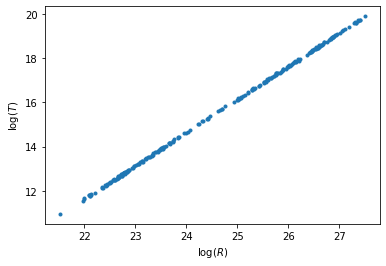

In [5]:
#1
import matplotlib.pyplot as plt
import numpy as np
import astropy.constants as cons
au = cons.au.value
s = 24*3600

d_exp = np.loadtxt('../etu-02-python-intermediaire/exoplanets.dat')
R = d_exp[:,0]*au
T = d_exp[:,1]*s

plt.figure()
lR = np.log(R)
lT = np.log(T)
plt.plot(lR,lT,'.')
plt.xlabel("$\log(R)$")
plt.ylabel("$\log(T)$")
plt.show()

## Décroissance exponentielle

On va ici tenter de modéliser la vitesse de décroissance de l'épaisseur de mousse de bière. On reprendra pour cela les données présentées par Arnd Leike, chercheur à l'Université Ludwig Maximilians de Munich, dans une publication  qui lui a valu le prix Ig Nobel en 2002.

Récupérer les données présentées dans le tableau 1 de la publication disponible au lien suivant: disponible ici: https://www.tf.uni-kiel.de/matwis/amat/iss/kap_2/articles/beer_article.pdf. 

### Questions

1. Représentez le logarithme décimal de l'epaisseur de mousse de la Augustinerbräu en fonction du temps: $\log_{10}(h) = f(t)$. 

2. Effectuez l'ajustement qui vous semble le plus approprié, et en déduire le modèle de décroissance auquel cet ajustement correspond. Déterminez le  temps caractéristique de la décroissance 

3. Effectuer un ajustement exponentiel de la fonction $h(t)$ (cf résultat ci-dessous), et comparez vos résultats à ceux de la question précédente.

4. Le taux de désintégration d'un matériau radioactif suit également une loi exponentielle. Peut-on trouver une analogie avec l'épaisseur de la mousse de bière?

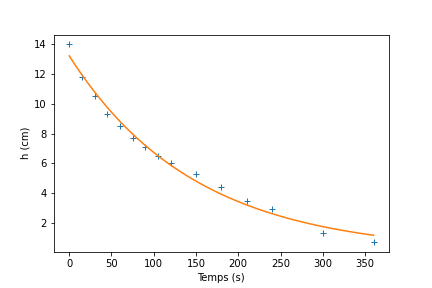

In [15]:
from IPython.display import Image
Image(filename = "fitexp.png", width=500, height=500)

#### Questions

Dans le tableau 1 de l'article de Leike, l'auteur a également associé des incertitudes aux mesures d'épaisseur de mousses. 

5. Représentez ces incertitudes graphiquement en utilisant la fonction `errorbar` de matplotlib (cf résultat ci-dessous).


Il est possible, dans l'ajustement d'un modèle $y=f(x)$ aux données, de pondérer chaque mesure $y_i$ par son incertitude $\sigma_{yi}$.  Pour se faire, on minimise en fait sur sa mesure dans l'ajustement la quantité appelée "Khi-2", et définie par:

$$ 
\chi^2 = \Sigma  \frac{(y_i - f(x_i))^2 }{{\sigma_{yi}}^2} 
$$

6. Reprendre la question 3 en passant les erreurs $\sigma_yi$ dans le paramètre *sigma* de la fonction `curve_fit`. On veillera à remplacer les valeurs d'incertitudes nulles par une valeur > 0 pour permettre la convergence de l'ajustement (cf equation précédente).

On pourra remarquer qu'en plus des paramètres ajustés, un 2eme paramètre est retournée par la fonction `curve_fit`. Il s'agit de leur matrice de covariance de ces paramètres (que l'on peut noter `pcov`, dont on peut extraire l'incertitude sur chacun des paramètres, donnée par  `perr = np.sqrt(np.diag(pcov))`. 

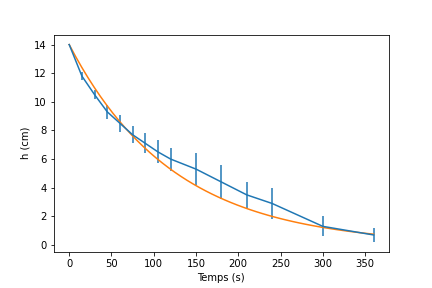

In [23]:
from IPython.display import Image
Image(filename = "fitexp_err.png", width=500, height=500)

## Ajustement sinusoidal

On va maintenant travailler sur mes mesures de température effectué à la station météorolgique de Montélimar, qui serviront également pour le mini-projet. Ces données sont disponibles sur le site https://www.ecad.eu/. 

#### Questions
1. Chargez et représentez les températures quotidiennes sur la décennie 1970.  
2. On observe très clairement des fluctuations saisonnières dans ces données. Proposez un ajustement pour les modéliser et réalisez le.

**Remarques**

Il est conseillé d'utiliser des variables de type `numpy.datetime64` pour manipuler les dates. 

Suivant la version de matplotlib que vous utilisez, il est cependant possible que vous ayez des problèmes pour représenter ce type de variables. On pourra alors choisir de les transformer en variables réelles, en utilisant la commande `astype(float)`. 


In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Récupération des données
a = np.loadtxt('ECA_blended_custom/TG_STAID000786.txt',skiprows = 20,delimiter=',')
station_id = a[:,0]
date = a[:,1]
T = a[:,2]/10
Q = a[:,3] # facteur de qualité
# Use valid data only
date = date[Q == 0]
T = T[Q == 0]

# Construction de la variable de temps
dt = []
for d in date:
    Y = str(d)[0:4]
    M = str(d)[4:6]
    d = str(d)[6:8]
    #print(Y,M,d)
    dt.append(np.datetime64(Y+'-'+M+'-'+d))
dt = np.array(dt)  # On enregistre les variables d etemps comme un numpy.array de datetime64.

print("Il y a",len(T)," mesures de température dans ce fichier entre",min(dt),",et",max(dt))

Il y a 36517  mesures de température dans ce fichier entre 1920-08-17 ,et 2020-08-10


[  8.61240758 365.11856721  -1.91170867  12.73283736]
[0.0722268  0.16939944 0.01694246 0.05119838]


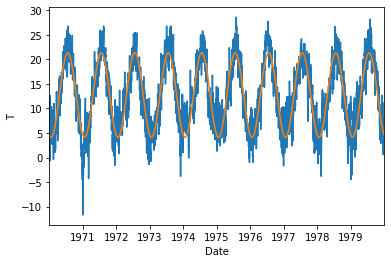

In [24]:
# Représentation
sel = np.logical_and(dt>np.datetime64('1970-01'),dt<np.datetime64('1980-01'))

dt1970 = dt[sel]
dtf1970 = dt1970.astype(float)
T1970 = T[sel]

plt.figure()
plt.plot(dt1970,T1970)
plt.xlabel('Date')
plt.ylabel('T')
plt.xlim(min(dt1970),max(dt1970))

# Ajustement sinusoidal
def sinLaw(x,a,T0,phi,c):
    w = 2*np.pi/T0
    return a*np.sin(w*x+phi)+c

params, covar = curve_fit(sinLaw,dt1970,T1970,[10,365,0,np.mean(T)])
perr = np.sqrt(np.diag(covar))

# Attention: pour calculer la fonction, on doit utiliser un tableau de réels plutot que de datetime64
y_model = params[0]*np.sin(2*np.pi/params[1]*dtf1970+params[2])+params[3]
plt.plot(dt1970,y_model)
print(params)
print(perr)